In [19]:
from keras.models import load_model
import cv2
import numpy as np
from metrics import Metrics, top_3_acc
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [17]:
images = [f for f in os.listdir(".") if f.endswith(".jpg")]

In [4]:
model = load_model('models/model.hdf5',custom_objects={'top_3_acc': top_3_acc})

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',top_3_acc])

In [27]:
input_size = (299, 150)
batch_size = 64
DATASET_ROOT_PATH="../../mozgalo" ### POSTAVI ISPRAVNO!!!
VALIDATION_PATH = os.path.join(DATASET_ROOT_PATH, 'validation') ### Projveri jel ovako kod tebe???

def preprocess_image(img):
    return img
    #img_array = img_to_array(img)
    # TODO: Preprocessing
    #return array_to_img(img_array)
    
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                                            samplewise_center=True,
                                            samplewise_std_normalization=True)

validation_flow = validation_datagen.flow_from_directory(
        VALIDATION_PATH, 
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical')


filenames = validation_flow.filenames
nb_samples = len(filenames)

predict = model.predict_generator(validation_flow,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)

Found 96 images belonging to 25 classes.


In [52]:
true_classes = validation_flow.classes
class_labels = list(validation_flow.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                  precision    recall  f1-score   support

          Smiths       0.00      0.00      0.00         4
         Wegmans       0.00      0.00      0.00         4
           HyVee       0.00      0.00      0.00         4
     CVSPharmacy       0.00      0.00      0.00         4
             Heb       0.00      0.00      0.00         4
       Walgreens       0.00      0.00      0.00         4
            Frys       0.00      0.00      0.00         4
       JewelOsco       0.00      0.00      0.00         4
         Safeway       0.00      0.00      0.00         4
        StopShop       0.00      0.00      0.00         4
          Traget       0.00      0.00      0.00         4
     KingSoopers       0.00      0.00      0.00         4
       ShopeRite       0.00      0.00      0.00         4
       FredMeyer       0.00      0.00      0.00         4
          Costco       0.00      0.00      0.00         4
       Albersons       0.00      0.00      0.00         4
         Walm

/Users/Dkopljar/.virtualenvs/birddet3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Dkopljar/.virtualenvs/birddet3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


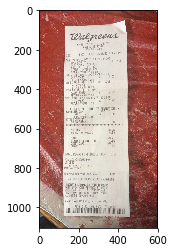

Predicted:  Wegmans |  Filename:  Albersons/58eb6a9a5afc2bdd2ac352fb.jpg
------------


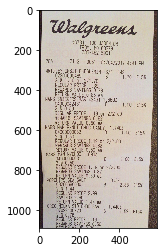

Predicted:  Kroger |  Filename:  Albersons/58eb6a9a5afc2bdd2ac353a2.jpg
------------


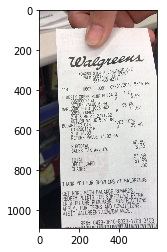

Predicted:  publix |  Filename:  Albersons/58eb6a9a5afc2bdd2ac353a4.jpg
------------


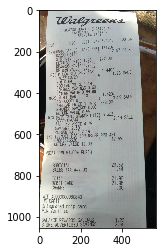

Predicted:  publix |  Filename:  Albersons/58eb6a9a5afc2bdd2ac353a5.jpg
------------


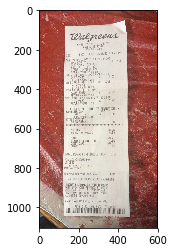

Predicted:  Kroger |  Filename:  BJs/58eb6a9a5afc2bdd2ac352fb.jpg
------------


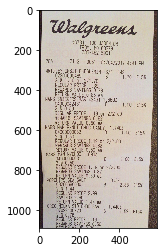

Predicted:  Safeway |  Filename:  BJs/58eb6a9a5afc2bdd2ac353a2.jpg
------------


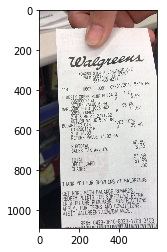

Predicted:  Kroger |  Filename:  BJs/58eb6a9a5afc2bdd2ac353a4.jpg
------------


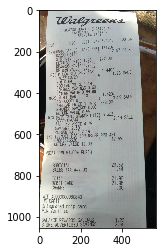

Predicted:  publix |  Filename:  BJs/58eb6a9a5afc2bdd2ac353a5.jpg
------------


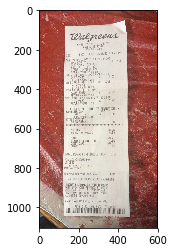

Predicted:  publix |  Filename:  CVSPharmacy/58eb6a9a5afc2bdd2ac352fb.jpg
------------


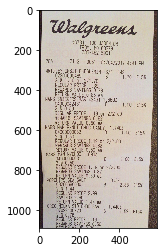

Predicted:  Kroger |  Filename:  CVSPharmacy/58eb6a9a5afc2bdd2ac353a2.jpg
------------


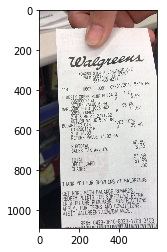

Predicted:  publix |  Filename:  CVSPharmacy/58eb6a9a5afc2bdd2ac353a4.jpg
------------


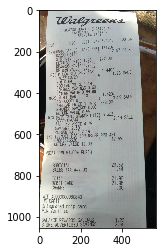

Predicted:  Kroger |  Filename:  CVSPharmacy/58eb6a9a5afc2bdd2ac353a5.jpg
------------


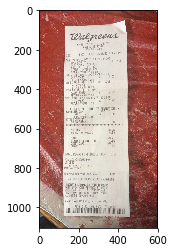

Predicted:  Smiths |  Filename:  Costco/58eb6a9a5afc2bdd2ac352fb.jpg
------------


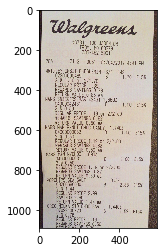

Predicted:  publix |  Filename:  Costco/58eb6a9a5afc2bdd2ac353a2.jpg
------------


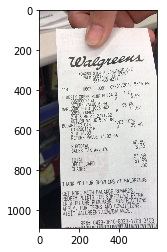

Predicted:  publix |  Filename:  Costco/58eb6a9a5afc2bdd2ac353a4.jpg
------------


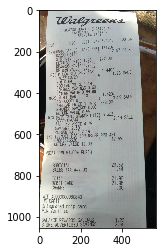

Predicted:  Kroger |  Filename:  Costco/58eb6a9a5afc2bdd2ac353a5.jpg
------------


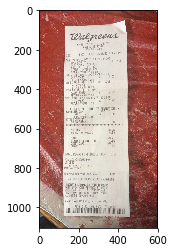

Predicted:  publix |  Filename:  FredMeyer/58eb6a9a5afc2bdd2ac352fb.jpg
------------


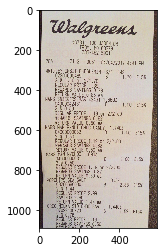

Predicted:  Wegmans |  Filename:  FredMeyer/58eb6a9a5afc2bdd2ac353a2.jpg
------------


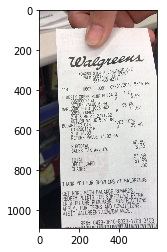

Predicted:  publix |  Filename:  FredMeyer/58eb6a9a5afc2bdd2ac353a4.jpg
------------


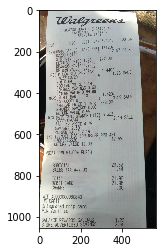

Predicted:  Kroger |  Filename:  FredMeyer/58eb6a9a5afc2bdd2ac353a5.jpg
------------


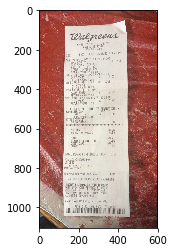

Predicted:  Kroger |  Filename:  Frys/58eb6a9a5afc2bdd2ac352fb.jpg
------------


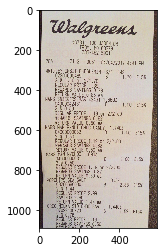

Predicted:  Wegmans |  Filename:  Frys/58eb6a9a5afc2bdd2ac353a2.jpg
------------


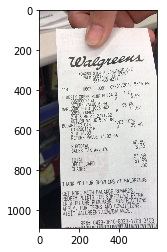

Predicted:  publix |  Filename:  Frys/58eb6a9a5afc2bdd2ac353a4.jpg
------------


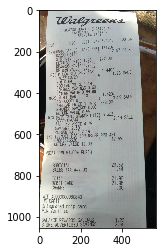

Predicted:  publix |  Filename:  Frys/58eb6a9a5afc2bdd2ac353a5.jpg
------------


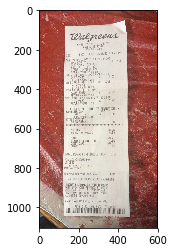

Predicted:  publix |  Filename:  Heb/58eb6a9a5afc2bdd2ac352fb.jpg
------------


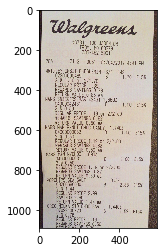

Predicted:  Wegmans |  Filename:  Heb/58eb6a9a5afc2bdd2ac353a2.jpg
------------


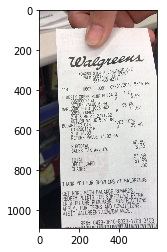

Predicted:  publix |  Filename:  Heb/58eb6a9a5afc2bdd2ac353a4.jpg
------------


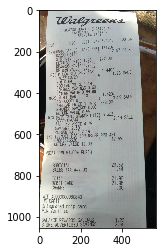

Predicted:  Kroger |  Filename:  Heb/58eb6a9a5afc2bdd2ac353a5.jpg
------------


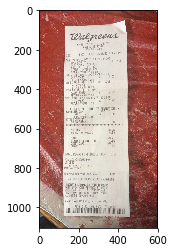

Predicted:  Wegmans |  Filename:  HyVee/58eb6a9a5afc2bdd2ac352fb.jpg
------------


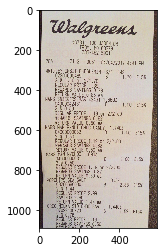

Predicted:  Kroger |  Filename:  HyVee/58eb6a9a5afc2bdd2ac353a2.jpg
------------


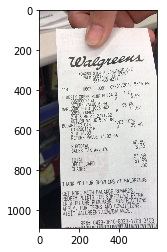

Predicted:  Wegmans |  Filename:  HyVee/58eb6a9a5afc2bdd2ac353a4.jpg
------------


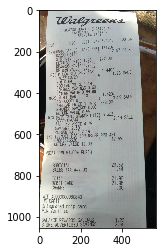

Predicted:  publix |  Filename:  HyVee/58eb6a9a5afc2bdd2ac353a5.jpg
------------


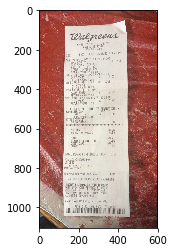

Predicted:  Wegmans |  Filename:  JewelOsco/58eb6a9a5afc2bdd2ac352fb.jpg
------------


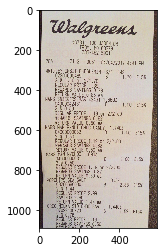

Predicted:  Smiths |  Filename:  JewelOsco/58eb6a9a5afc2bdd2ac353a2.jpg
------------


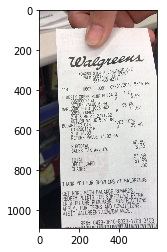

Predicted:  Wegmans |  Filename:  JewelOsco/58eb6a9a5afc2bdd2ac353a4.jpg
------------


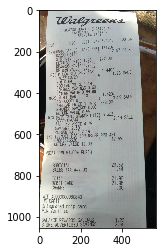

Predicted:  Smiths |  Filename:  JewelOsco/58eb6a9a5afc2bdd2ac353a5.jpg
------------


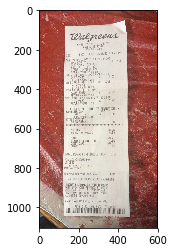

Predicted:  publix |  Filename:  KingSoopers/58eb6a9a5afc2bdd2ac352fb.jpg
------------


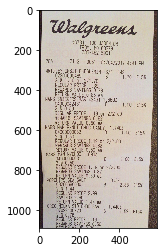

Predicted:  publix |  Filename:  KingSoopers/58eb6a9a5afc2bdd2ac353a2.jpg
------------


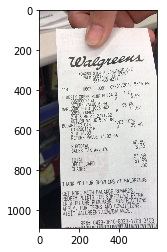

Predicted:  Wegmans |  Filename:  KingSoopers/58eb6a9a5afc2bdd2ac353a4.jpg
------------


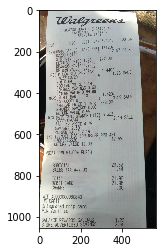

Predicted:  publix |  Filename:  KingSoopers/58eb6a9a5afc2bdd2ac353a5.jpg
------------


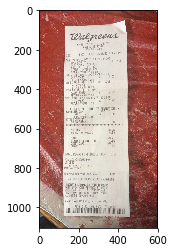

Predicted:  Wegmans |  Filename:  Kroger/58eb6a9a5afc2bdd2ac352fb.jpg
------------


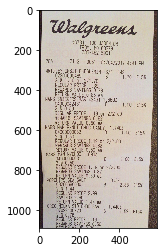

Predicted:  publix |  Filename:  Kroger/58eb6a9a5afc2bdd2ac353a2.jpg
------------


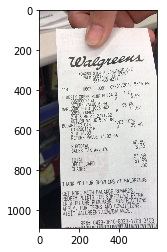

Predicted:  publix |  Filename:  Kroger/58eb6a9a5afc2bdd2ac353a4.jpg
------------


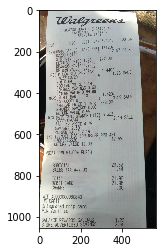

Predicted:  publix |  Filename:  Kroger/58eb6a9a5afc2bdd2ac353a5.jpg
------------


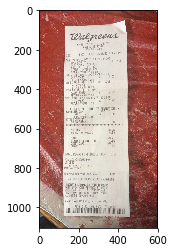

Predicted:  Kroger |  Filename:  Mejier/58eb6a9a5afc2bdd2ac352fb.jpg
------------


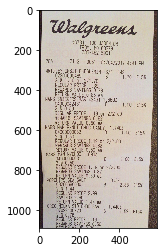

Predicted:  Wegmans |  Filename:  Mejier/58eb6a9a5afc2bdd2ac353a2.jpg
------------


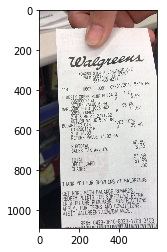

Predicted:  publix |  Filename:  Mejier/58eb6a9a5afc2bdd2ac353a4.jpg
------------


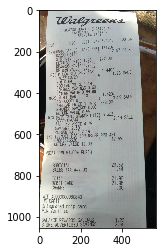

Predicted:  Wegmans |  Filename:  Mejier/58eb6a9a5afc2bdd2ac353a5.jpg
------------


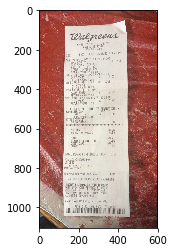

Predicted:  publix |  Filename:  Safeway/58eb6a9a5afc2bdd2ac352fb.jpg
------------


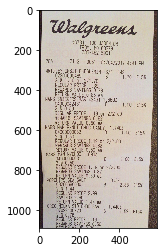

Predicted:  publix |  Filename:  Safeway/58eb6a9a5afc2bdd2ac353a2.jpg
------------


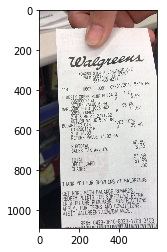

Predicted:  publix |  Filename:  Safeway/58eb6a9a5afc2bdd2ac353a4.jpg
------------


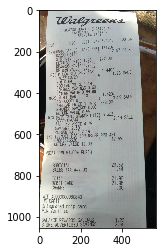

Predicted:  Kroger |  Filename:  Safeway/58eb6a9a5afc2bdd2ac353a5.jpg
------------


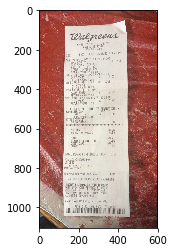

Predicted:  Kroger |  Filename:  SamsClub/58eb6a9a5afc2bdd2ac352fb.jpg
------------


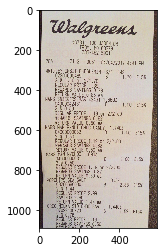

Predicted:  publix |  Filename:  SamsClub/58eb6a9a5afc2bdd2ac353a2.jpg
------------


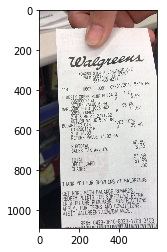

Predicted:  Wegmans |  Filename:  SamsClub/58eb6a9a5afc2bdd2ac353a4.jpg
------------


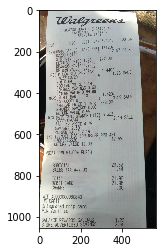

Predicted:  publix |  Filename:  SamsClub/58eb6a9a5afc2bdd2ac353a5.jpg
------------


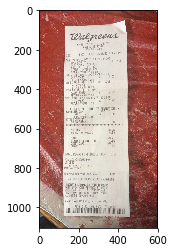

Predicted:  Wegmans |  Filename:  ShopeRite/58eb6a9a5afc2bdd2ac352fb.jpg
------------


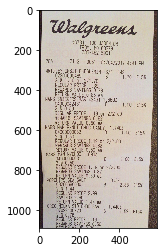

Predicted:  Kroger |  Filename:  ShopeRite/58eb6a9a5afc2bdd2ac353a2.jpg
------------


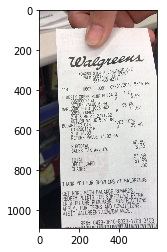

Predicted:  publix |  Filename:  ShopeRite/58eb6a9a5afc2bdd2ac353a4.jpg
------------


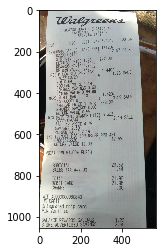

Predicted:  publix |  Filename:  ShopeRite/58eb6a9a5afc2bdd2ac353a5.jpg
------------


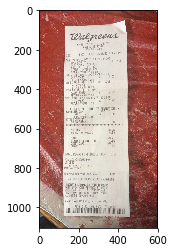

Predicted:  publix |  Filename:  Smiths/58eb6a9a5afc2bdd2ac352fb.jpg
------------


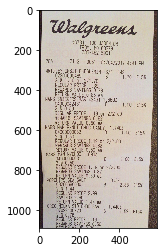

Predicted:  Smiths |  Filename:  Smiths/58eb6a9a5afc2bdd2ac353a2.jpg
------------


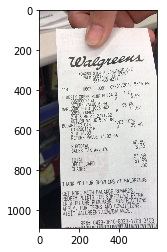

Predicted:  publix |  Filename:  Smiths/58eb6a9a5afc2bdd2ac353a4.jpg
------------


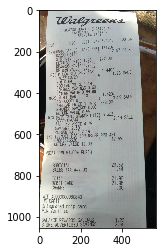

Predicted:  publix |  Filename:  Smiths/58eb6a9a5afc2bdd2ac353a5.jpg
------------


In [51]:
plt.figure()
for i,predicted in enumerate(predicted_classes):
    if(predicted != true_classes[i]):
        img = Image.open(os.path.join(VALIDATION_PATH,validation_flow.filenames[i]))
        plt.imshow(img)
        plt.show()
        print("Predicted: ", class_labels[predicted], "|  Filename: ",validation_flow.filenames[i])
        print("------------")